 Assignment 3: Stock Price Prediction – Netflix (NFLX)


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:

df = pd.read_csv("NFLX.csv")  
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [3]:

df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


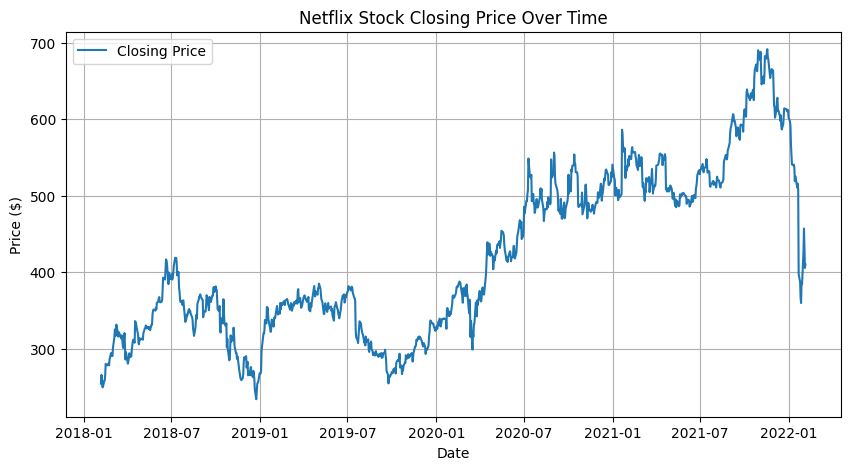

In [5]:

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label="Closing Price")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title("Netflix Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()


In [6]:

df['Prediction'] = df['Close'].shift(-7)
df.tail(10)  


,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000,429.480011
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800,405.600006
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000,410.170013
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700,NaN
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600,NaN
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,NaN
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,NaN
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,NaN
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,NaN
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,NaN


In [7]:


X = df[['Close']][:-7]  
y = df['Prediction'][:-7]


In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:

y_pred = model.predict(X_test)


In [11]:

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.929646804661829
Mean Squared Error: 784.3802821630538


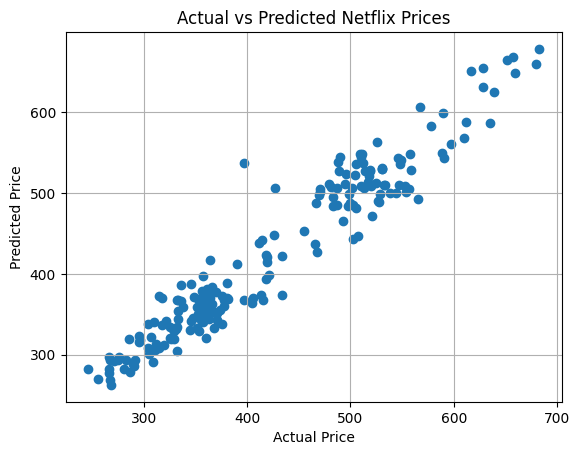

In [12]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Netflix Prices")
plt.grid(True)
plt.show()


In [13]:

future_prices = df[['Close']].tail(7)  
future_predictions = model.predict(future_prices)

print(" Predicted Netflix Prices for Next 7 Days:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: ${price:.2f}")


 Predicted Netflix Prices for Next 7 Days:
Day 1: $389.25
Day 2: $387.01
Day 3: $428.06
Day 4: $456.83
Day 5: $430.30
Day 6: $407.39
Day 7: $411.77
